In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/Iris.csv")

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.drop(columns=["Id"], inplace=True)

dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset["Species"] = dataset["Species"].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


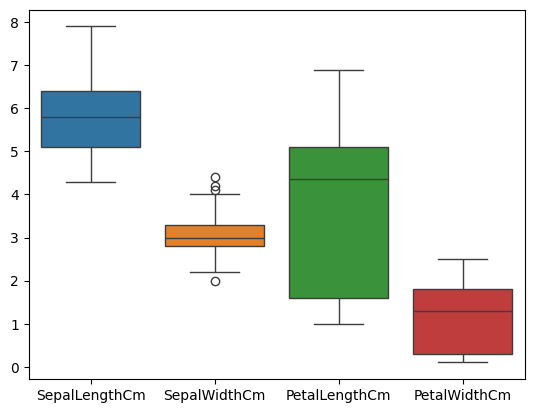

In [ ]:
sns.boxplot(data=dataset)
plt.show()

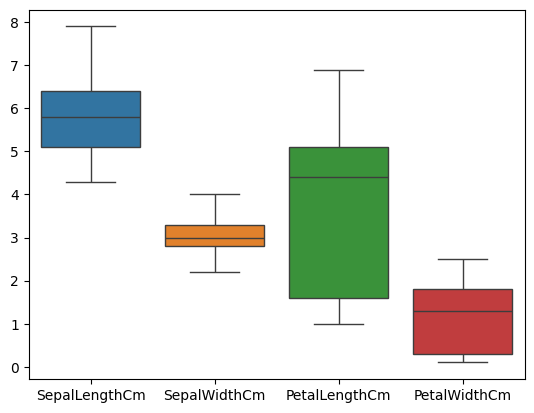

In [ ]:
Q1 = dataset["SepalWidthCm"].quantile(0.25)
Q3 = dataset["SepalWidthCm"].quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

dataset = dataset[(dataset["SepalWidthCm"] >= LB) & (dataset["SepalWidthCm"] <= UB)]

sns.boxplot(data=dataset)
plt.show()

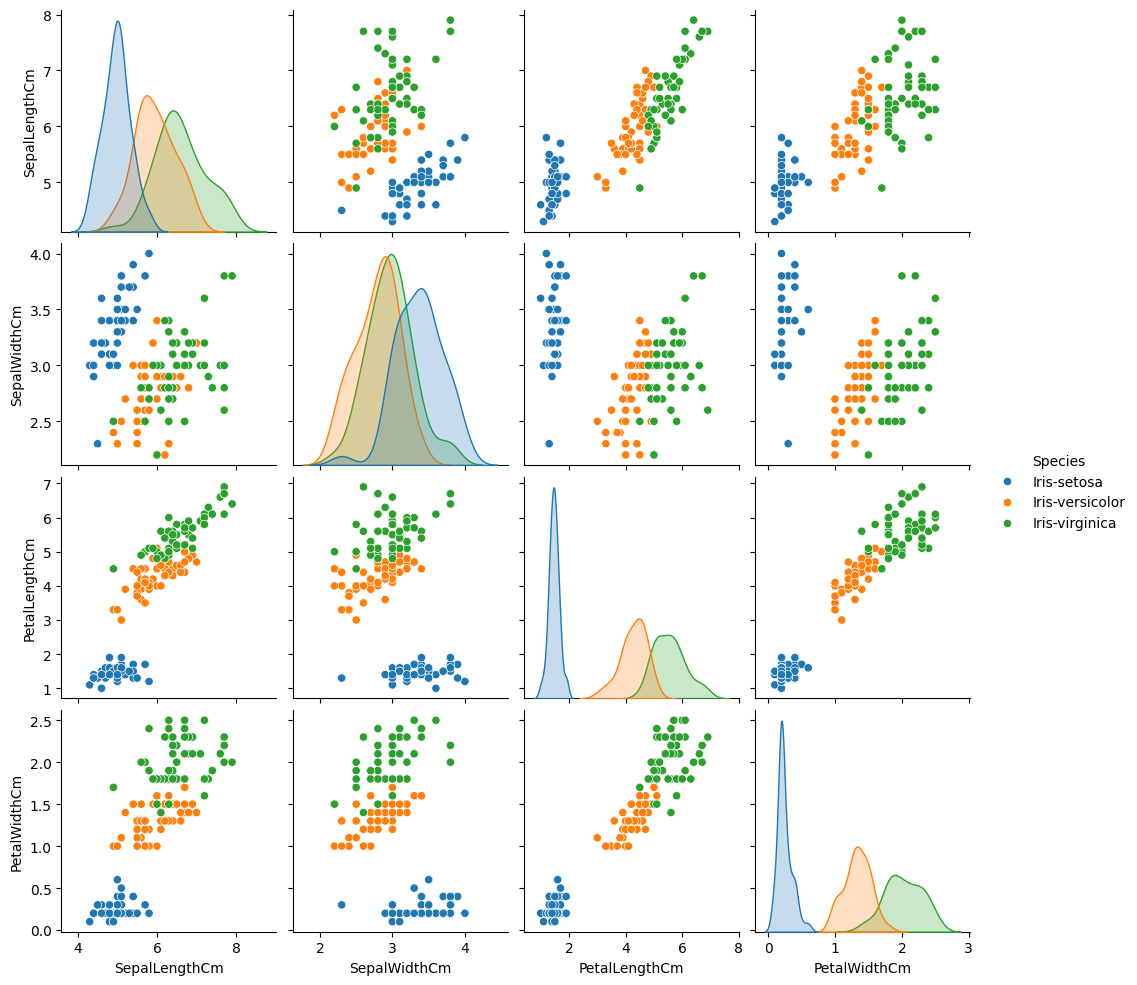

In [ ]:
sns.pairplot(data=dataset, hue="Species")
plt.show()

In [ ]:
dataset = dataset[["PetalLengthCm", "SepalWidthCm"]]

dataset.head()

,PetalLengthCm,SepalWidthCm
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6


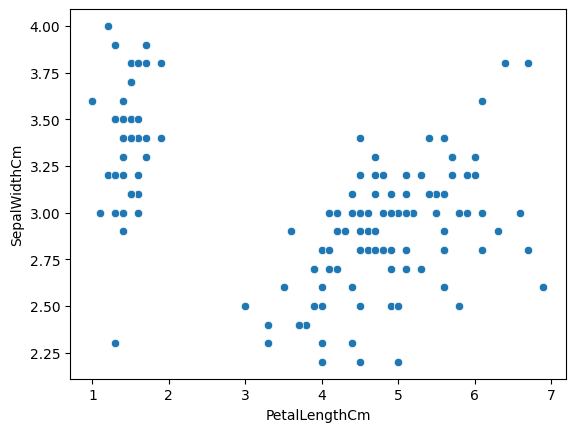

In [ ]:
sns.scatterplot(data=dataset, x="PetalLengthCm", y="SepalWidthCm")
plt.show()

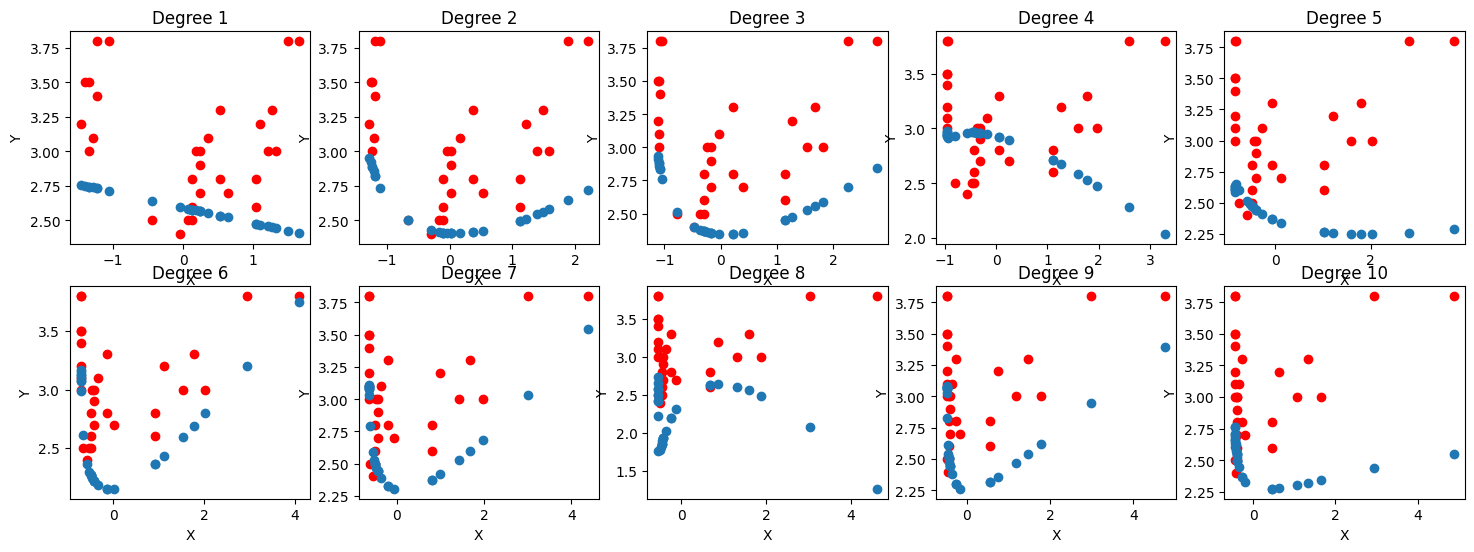

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error

scaler = StandardScaler()

X = dataset["PetalLengthCm"].values.reshape(-1, 1)
y = dataset["SepalWidthCm"]

X_powers = np.empty((X.shape[0], 0))
train_rmse_errors = []
test_rmse_errors = []

def model(X, theta):
    return np.dot(X, theta)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta


plt.figure(figsize=(18, 16))

for i in range(10):
    X_power = X ** (i + 1)
    X_powers = np.hstack((X_power, X_powers))

    X_train, X_test, y_train, y_test = train_test_split(X_powers, y, test_size=0.2, random_state=101)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    theta = np.random.randn(X_train.shape[1], 1)

    n_iterations = 1000
    learning_rate = 1e-3

    theta_final = gradient_descent(X_train, y_train.values.reshape(-1, 1), theta, learning_rate, n_iterations)

    predictions_test = model(X_test, theta_final)
    predictions_train = model(X_train, theta_final)

    l = X_test[:, :-(i + 1)]

    plt.subplot(5, 5, (i + 1))
    plt.scatter(l, y_test, c='r')
    plt.scatter(l, predictions_test)
    plt.title(f"Degree {i + 1}")
    plt.xlabel('X')
    plt.ylabel('Y')


    train_RMSE = np.sqrt(mean_squared_error(y_train,predictions_train))

    test_RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

plt.show()

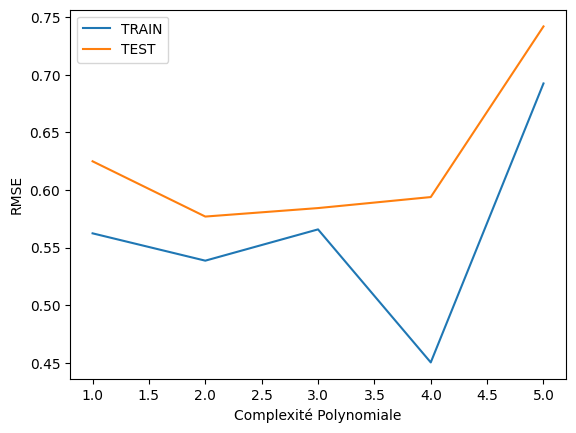

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend()